## IA Notebook 2 | Ataques Adversarios.

In [2]:
import tensorflow as tf
import keras as ks

import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Importamos el modelo guardado en keras
from keras.applications.inception_v3 import InceptionV3, decode_predictions
from keras import backend as K

tf.compat.v1.disable_eager_execution()

In [4]:
# Cargamos el modelo de las API's de Google
iv3 = InceptionV3()

Instructions for updating:
Colocations handled automatically by placer.
96124928/96112376 [==============================] - 19s 0us/step


In [7]:
# Imprimimos el resumen del modelo
print(iv3.summary())

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [3]:
from tensorflow.keras.preprocessing import image

x_img = image.img_to_array(
    image.load_img(
        "../deep_learning/images/mouse.jpg",
        target_size=(299, 299)
    )
)

print(x_img.shape)
# Normalización de los datos de 0 - 255 -> -1 - 1
x_img /= 255

x_img -= 0.5

x_img *= 2

x_img = x_img.reshape([1, x_img.shape[0], x_img.shape[1], x_img.shape[2]])

#y_predict = iv3.predict(x_img)

(299, 299, 3)


In [15]:
decode_predictions(y_predict)

[[('n03793489', 'mouse', 0.92184633),
  ('n04372370', 'switch', 0.020887928),
  ('n03532672', 'hook', 0.0069497265),
  ('n03759954', 'microphone', 0.004509263),
  ('n04041544', 'radio', 0.0037044939)]]

## Ataques adversarios

In [21]:
input_layer = iv3.layers[0].input
output_layer = iv3.layers[-1].output

target_class = 951

loss = output_layer[0, target_class]

grad = K.gradients(loss, input_layer)[0]

optimize_gradient = K.function([input_layer, K.learning_phase()], [grad, loss])

adv = np.copy(x_img)

pert = 0.01

max_pert = x_img + 0.01
min_pert = x_img - 0.01

cost = 0.0

while cost < 0.95:
    
    gr, cost = optimize_gradient([adv, 0])
    
    adv += gr 
    
    adv = np.clip(adv, min_pert, max_pert)
    adv = np.clip(adv, -1, 1)
    
    print("Lemon cost:", cost)

hack_img = np.copy(adv)

Lemon cost: 0.00075336953
Lemon cost: 0.0007931426
Lemon cost: 0.0008361295
Lemon cost: 0.0008824456
Lemon cost: 0.0009318489
Lemon cost: 0.0009851039
Lemon cost: 0.0010416666
Lemon cost: 0.0011034498
Lemon cost: 0.0011715316
Lemon cost: 0.0012447934
Lemon cost: 0.0013253393
Lemon cost: 0.0014141565
Lemon cost: 0.0015089911
Lemon cost: 0.0016145005
Lemon cost: 0.0017316646
Lemon cost: 0.0018600873
Lemon cost: 0.0020091315
Lemon cost: 0.0021837063
Lemon cost: 0.0023841872
Lemon cost: 0.002607415
Lemon cost: 0.0028596953
Lemon cost: 0.0031583125
Lemon cost: 0.0034960406
Lemon cost: 0.003886497
Lemon cost: 0.0043607205
Lemon cost: 0.0049343305
Lemon cost: 0.0056480155
Lemon cost: 0.006570552
Lemon cost: 0.0077946438
Lemon cost: 0.00954902
Lemon cost: 0.011983089
Lemon cost: 0.015527729
Lemon cost: 0.022202298
Lemon cost: 0.03347115
Lemon cost: 0.059994914
Lemon cost: 0.14475547
Lemon cost: 0.27710593
Lemon cost: 0.45992702
Lemon cost: 0.12372456
Lemon cost: 0.9641485


In [22]:
adv /= 2

adv += 0.5

adv *= 255

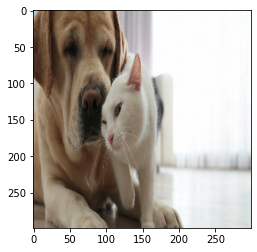

In [23]:
plt.imshow(adv[0].astype(np.uint8))
plt.show()

In [24]:
from PIL import Image
img = Image.fromarray(adv[0].astype(np.uint8))
img.save("./images/hack-img.png")